In [99]:
from scipy.integrate import odeint
from array import *
from scipy.optimize import curve_fit
import scipy.integrate as spi
from lmfit import minimize, Parameters, Model, fit_report
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import math
import pandas as pd
import seaborn as sns

%matplotlib inline


In [100]:
def PD_Model (Conc, E_base, E_max, IC50, Hill_Coeff):
    E = E_base + np.divide(np.multiply(E_max,np.power(Conc,Hill_Coeff)),(np.power(IC50, Hill_Coeff)+np.power(Conc,Hill_Coeff)))
    return E
PDModel = Model(PD_Model)

In [101]:
Data = [{'Rem':0, 'Nit':0, 'Res':0.10}]
Data.append({'Rem':0, 'Nit':0.63, 'Res':4.90})
Data.append({'Rem':0, 'Nit':1.25, 'Res':5.40})
Data.append({'Rem':0, 'Nit':2.5, 'Res':13.90})
Data.append({'Rem':0, 'Nit':5, 'Res':34.80})
Data.append({'Rem':0, 'Nit':10, 'Res':70.10})

Data.append({'Rem':0.63, 'Nit':0.0, 'Res':0.00})
Data.append({'Rem':0.63, 'Nit':0.63, 'Res':2.40})
Data.append({'Rem':0.63, 'Nit':1.25, 'Res':5.90})
Data.append({'Rem':0.63, 'Nit':2.5, 'Res':32.40})
Data.append({'Rem':0.63, 'Nit':5, 'Res':45.20})
Data.append({'Rem':0.63, 'Nit':10, 'Res':57.60})

Data.append({'Rem':1.25, 'Nit':0.0, 'Res':2.60})
Data.append({'Rem':1.25, 'Nit':0.63, 'Res':6.40})
Data.append({'Rem':1.25, 'Nit':1.25, 'Res':13.10})
Data.append({'Rem':1.25, 'Nit':2.5, 'Res':50.30})
Data.append({'Rem':1.25, 'Nit':5, 'Res':51.00})
Data.append({'Rem':1.25, 'Nit':10, 'Res':70.90})

Data.append({'Rem':2.5, 'Nit':0.0, 'Res':3.50})
Data.append({'Rem':2.5, 'Nit':0.63, 'Res':7.50})
Data.append({'Rem':2.5, 'Nit':1.25, 'Res':15.00})
Data.append({'Rem':2.5, 'Nit':2.5, 'Res':63.80})
Data.append({'Rem':2.5, 'Nit':5, 'Res':50.30})
Data.append({'Rem':2.5, 'Nit':10, 'Res':69.50})

Data.append({'Rem':5, 'Nit':0.0, 'Res':10.30})
Data.append({'Rem':5, 'Nit':0.63, 'Res':15.00})
Data.append({'Rem':5, 'Nit':1.25, 'Res':48.20})
Data.append({'Rem':5, 'Nit':2.5, 'Res':45.20})
Data.append({'Rem':5, 'Nit':5, 'Res':69.40})
Data.append({'Rem':5, 'Nit':10, 'Res':72.10})

Data.append({'Rem':10, 'Nit':0.0, 'Res':60.20})
Data.append({'Rem':10, 'Nit':0.63, 'Res':70.90})
Data.append({'Rem':10, 'Nit':1.25, 'Res':100.00})
Data.append({'Rem':10, 'Nit':2.5, 'Res':100.00})
Data.append({'Rem':10, 'Nit':5, 'Res':100.00})
Data.append({'Rem':10, 'Nit':10, 'Res':82.30})

In [102]:
Data_df = pd.DataFrame(Data)

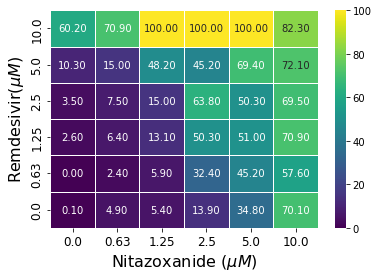

In [121]:
Data_plot = Data_df.pivot('Rem', 'Nit', 'Res')
ax1 = sns.heatmap(Data_plot, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1)
ax1.invert_yaxis()
ax1.set_ylabel("Remdesivir($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

## Model A:
#### Remdesivir upstream
#### Nitozaxonide downstream

In [104]:
Rem = Data_df.Rem.unique()
Nit = Data_df.Nit.unique()
UpstreamRes = np.asarray(Data_df[Data_df.Nit==0].Res/100)
Downstream_Isol = np.asarray(Data_df[Data_df.Rem==0].Res/100)
Downstream_Res=[]


In [105]:
PDModel.set_param_hint('E_base', value=0, vary = False)
PDModel.set_param_hint('E_max', value=0.5, min=0, max=1)
PDModel.set_param_hint('IC50', value=10, min=0, max=np.inf)
PDModel.set_param_hint('Hill_Coeff', value=3, min=0, max=np.inf)
params = PDModel.make_params()

In [106]:
result_Rem= PDModel.fit(UpstreamRes, params, Conc=Rem)
result_Nit_Isol = PDModel.fit(Downstream_Isol, params, Conc=Nit)

In [107]:
result_Rem

In [108]:
np.sum((result_Rem.best_fit-UpstreamRes)**2)

0.001305714431565753

In [122]:
for i in range(0,6):
    if i==0:
        E_R = result_Rem.best_fit
        E_N_Isol = result_Nit_Isol.best_fit
    else:
        E_R = np.vstack((E_R,result_Rem.best_fit))
        E_N_Isol = np.vstack((E_N_Isol,result_Nit_Isol.best_fit))

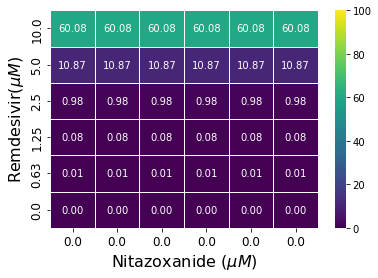

In [125]:
ax1 = sns.heatmap(E_R.T*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels =Rem , xticklabels =np.zeros(6) )
ax1.invert_yaxis()
ax1.set_ylabel("Remdesivir($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [109]:
result_Nit_Isol

In [110]:
np.sum((result_Nit_Isol.best_fit-Downstream_Isol)**2)

0.0022881755038693225

0.63
0.014966326899316762
1.25
0.032412737845676574
2.5
0.08120702131675873
5.0
0.03347944530623781
10.0
0.031753077458429126


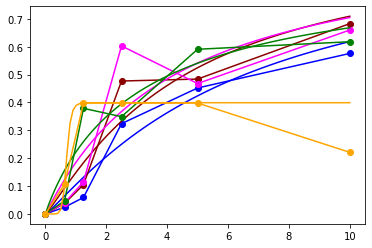

In [126]:
result_Nit=[]
IC50 =[6.547,4.111,3.691,3.274, 0.6514]
Hill = [1.14,1.132,1.031,0.9544, 0.9544]
color = ['b', 'darkred', 'magenta', 'green', 'orange']
i=0
Ecombo = result_Nit_Isol.best_fit
E_N = result_Nit_Isol.best_fit
for UpConc in Rem[1:]:
    print(UpConc)
    PDModel.set_param_hint('E_base', value=0, vary = False)
    PDModel.set_param_hint('IC50', value=IC50[i], min=0, max=np.inf)
    PDModel.set_param_hint('Hill_Coeff', value=Hill[i], min=0, max=np.inf)
    PDModel.set_param_hint('E_max', value=1-PDModel.eval(result_Rem.params, Conc = UpConc), min=0, max=1, vary=False)
    params = PDModel.make_params()
    Downstream_Res = (np.asarray(Data_df[Data_df.Rem == UpConc].Res)-
                      np.asarray(Data_df[(Data_df.Nit == 0)&(Data_df.Rem == UpConc)].Res))/100
   # Downstream_Res= (np.asarray(Data_df[Data_df.Rem == UpConc].Res)/100-
   #                   PDModel.eval(result_Rem.params, Conc = UpConc))
    result_Nit.append(PDModel.fit(Downstream_Res, params, Conc=Nit))
    print(np.sum((result_Nit[-1].best_fit-Downstream_Res)**2))
    Ecombo = np.vstack((Ecombo, PDModel.eval(result_Nit[i].params, Conc = Nit)+PDModel.eval(result_Rem.params, Conc = UpConc)))
    E_N = np.vstack((E_N, result_Nit[-1].best_fit))
    plt.plot(Nit, Downstream_Res, '-o', color = color[i])
    plt.plot(np.linspace(Nit[0],Nit[-1], 100), 
             PDModel.eval(result_Nit[i].params, Conc = np.linspace(Nit[0],Nit[-1], 100)),  color = color[i])
    i=i+1

In [112]:
result_Nit[4]

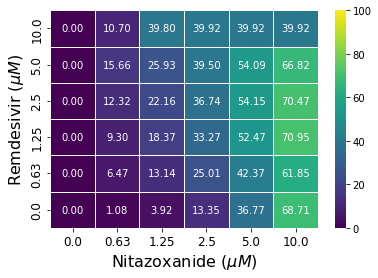

In [128]:
ax1 = sns.heatmap(E_N*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels = Rem, xticklabels =Nit)
ax1.invert_yaxis()
ax1.set_ylabel("Remdesivir ($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [73]:
result_Nit[4].params['IC50'].value=3.174
result_Nit[4].params['Hill_Coeff'].value=0.956
Ecombo[-1] = PDModel.eval(result_Nit[4].params, Conc = Nit)+PDModel.eval(result_Rem.params, Conc = 10)

In [113]:
Ecombo*100

array([[0.00000000e+00, 1.08473800e+00, 3.91862533e+00, 1.33459670e+01,
        3.67730811e+01, 6.87139775e+01],
       [6.66864344e-03, 6.48059462e+00, 1.31445495e+01, 2.50162044e+01,
        4.23816204e+01, 6.18586820e+01],
       [7.99250735e-02, 9.38154269e+00, 1.84532261e+01, 3.33467334e+01,
        5.25456121e+01, 7.10301854e+01],
       [9.77854148e-01, 1.33015754e+01, 2.31422571e+01, 3.77180428e+01,
        5.51260589e+01, 7.14494940e+01],
       [1.08665999e+01, 2.65276157e+01, 3.67982690e+01, 5.03661734e+01,
        6.49574350e+01, 7.76827569e+01],
       [6.00813954e+01, 7.07813973e+01, 9.98811602e+01, 9.99998796e+01,
        9.99999999e+01, 1.00000000e+02]])

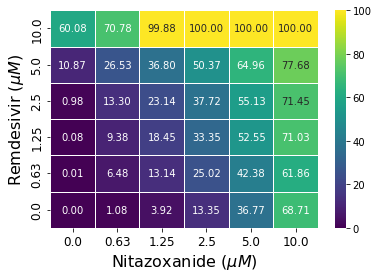

In [129]:
ax = sns.heatmap(Ecombo*100, vmin =0, vmax = 100, annot = True, fmt = '.2f',cmap ='viridis', linewidth = 1,
                 yticklabels = Rem, xticklabels = Nit)
ax.invert_yaxis()
ax.set_ylabel("Remdesivir ($\mu M$)", fontsize=16)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax.tick_params(axis="x", labelsize = 12)

In [115]:
Data_array= np.asarray(Data_plot)
Data_array

array([[  0.1,   4.9,   5.4,  13.9,  34.8,  70.1],
       [  0. ,   2.4,   5.9,  32.4,  45.2,  57.6],
       [  2.6,   6.4,  13.1,  50.3,  51. ,  70.9],
       [  3.5,   7.5,  15. ,  63.8,  50.3,  69.5],
       [ 10.3,  15. ,  48.2,  45.2,  69.4,  72.1],
       [ 60.2,  70.9, 100. , 100. , 100. ,  82.3]])

In [116]:
np.sum((Data_array-Ecombo*100)**2)

1974.1404434865353

In [117]:
np.sum((Data_array-np.mean(Data_array))**2)

36641.47

In [118]:
1-np.sum((Data_array-Ecombo*100)**2)/np.sum((Data_array-np.mean(Data_array))**2)

0.9461227826425486

In [130]:
delta_E = Ecombo*100-np.minimum(100,(E_N_Isol*100+E_R.T*100))

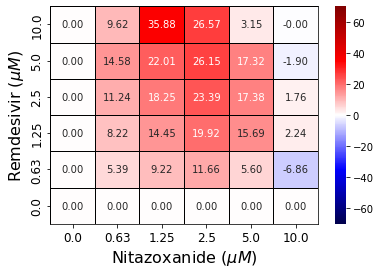

In [132]:
ax = sns.heatmap(delta_E, vmin =-70, vmax = 70, annot = True, fmt = '.2f', cmap ='seismic', linewidth = 0.5, 
                 linecolor = 'k', yticklabels = Rem, xticklabels = Nit)
ax.invert_yaxis()
ax.set_ylabel("Remdesivir ($\mu M$)", fontsize=16)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax.tick_params(axis="x", labelsize = 12)
for _, spine in ax.spines.items(): 
    spine.set_visible(True) 
    spine.set_linewidth(0.75)

In [119]:
IC50_Nit = [6.634]
IC50_Nit_err = [2.04]
Hill_Nit = [1.917]
Hill_Nit_err = [0.43]
for i in range(0,len(Rem[1:])):
    IC50_Nit.append(result_Nit[i].params['IC50'].value)
    IC50_Nit_err.append(result_Nit[i].params['IC50'].stderr)
    Hill_Nit.append(result_Nit[i].params['Hill_Coeff'].value)
    Hill_Nit_err.append(result_Nit[i].params['Hill_Coeff'].stderr)

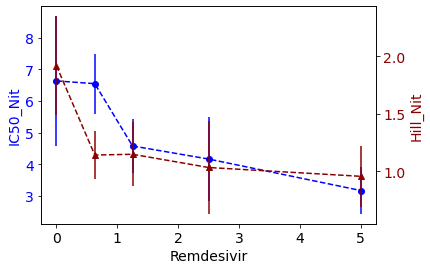

In [120]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx() 
ax1.errorbar(Rem[0:5], IC50_Nit[0:5], yerr = IC50_Nit_err[0:5], fmt =  '--o', color = 'b')
ax1.set_ylabel("IC50_Nit", color='b', fontsize=14)
ax1.tick_params(axis="y", labelcolor='b',labelsize = 14)
ax1.set_xlabel('Remdesivir', fontsize=14)
ax1.tick_params(axis="x", labelsize = 14)
ax2.errorbar(Rem[0:5], Hill_Nit[0:5], yerr = Hill_Nit_err[0:5], fmt = '--^', color = 'darkred')
ax2.set_ylabel("Hill_Nit", color='darkred', fontsize=14)
ax2.tick_params(axis="y", labelcolor='darkred', labelsize = 14)

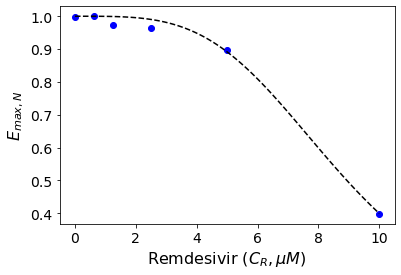

In [133]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(Rem, 1-np.asarray(Data_df[(Data_df.Nit == 0)].Res)/100, 'o', color = 'b')
ax1.plot(np.linspace(Rem[0], Rem[-1], 100), 
         1-PDModel.eval(result_Rem.params, Conc = np.linspace(Rem[0], Rem[-1], 100)), '--', color = 'k')
ax1.set_ylabel("$E_{max,N}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Remdesivir ($C_R, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [134]:
from sklearn.metrics import r2_score
r2_score(1-np.asarray(Data_df[(Data_df.Nit == 0)].Res)/100, 1-PDModel.eval(result_Rem.params, Conc = Rem))

0.9952839622722388

In [146]:
def sigmoidal (x, a, b, d, e):
    return a-(b*(x)**d)/(e**d + (x)**d)

sigmoidal_model = Model(sigmoidal)

sigmoidal_model.set_param_hint('a', value=0.5, min = 0, max = np.inf)
sigmoidal_model.set_param_hint('b', value=5, min=0, max=np.inf)
#sigmoidal_model.set_param_hint('c', value=8, min=5, max=np.inf)
sigmoidal_model.set_param_hint('d', value=2, min=0, max=np.inf)
sigmoidal_model.set_param_hint('e', value=3.545, min=0, max=np.inf)
params = sigmoidal_model.make_params()

IC50_sigmoid = sigmoidal_model.fit(IC50_Nit[0:5], params, x= Rem[0:5], weights = 1.0/np.asarray(IC50_Nit_err[0:5]))

In [147]:
IC50_sigmoid

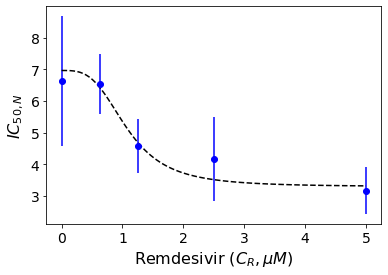

In [148]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Rem[0:5], IC50_Nit[0:5], yerr = IC50_Nit_err[0:5], fmt =  'o', color = 'b')
ax1.plot(np.linspace(Rem[0], Rem[4], 100), 
         sigmoidal_model.eval(IC50_sigmoid.params, x=np.linspace(Rem[0], Rem[4], 100)), '--', color = 'k')
ax1.set_ylabel("$IC_{50,N}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Remdesivir ($C_R, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [151]:
from sklearn.metrics import r2_score
r2_score(IC50_Nit[0:5], sigmoidal_model.eval(IC50_sigmoid.params, x=Rem[0:5]), 
         sample_weight= 1.0/np.asarray(IC50_Nit_err[0:5]))

0.951079308171888

In [152]:
def exp(x, a, b, c):
    return a*np.exp(-b*(x))+c
exp_model = Model(exp)

exp_model.set_param_hint('a', value=1.5, min = 0, max = np.inf)
exp_model.set_param_hint('b', value=2, min=0, max=np.inf)
exp_model.set_param_hint('c', value=2.5, min=0, max=np.inf)


params = exp_model.make_params()

Hill_N = exp_model.fit(Hill_Nit[0:5], params, x = Rem[0:5], weights = 1.0/np.asarray(Hill_Nit_err[0:5]))

In [153]:
Hill_N

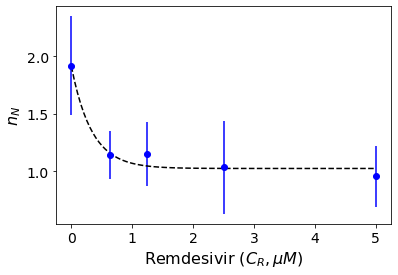

In [154]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Rem[0:5], Hill_Nit[0:5], yerr = Hill_Nit_err[0:5], fmt =  'o', color = 'b')
ax1.plot(np.linspace(Rem[0], Rem[4], 100), 
         exp_model.eval(Hill_N.params, x=np.linspace(Rem[0], Rem[4], 100)), '--', color = 'k')
ax1.set_ylabel("$n_{N}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Remdesivir ($C_R, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [155]:
r2_score(Hill_Nit[0:5], exp_model.eval(Hill_N.params, x=Rem[0:5]), 
         sample_weight= 1.0/np.asarray(Hill_Nit_err[0:5]))

0.962509220033725